<a href="https://colab.research.google.com/github/kumarirakhi19/Diabetes-Prediction/blob/main/Copy_of_Disease_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import important libraries

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
# Mounted the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load the data set

In [3]:
training_info = pd.read_csv('/content/drive/MyDrive/Disease prediction /diabetes_v2/diabetes_train_info.csv')

In [4]:
training_info.head()

,id,age,height,weight,gender
0,0,50,168,62.0,f
1,1,55,156,85.0,m
2,2,18857,165,64.0,male
3,3,17623,169,82.0,f
4,4,47,156,56.0,m


In [5]:
train_analysis = pd.read_csv('/content/drive/MyDrive/Disease prediction /diabetes_v2/diabetes_train_analysis.csv')

In [6]:
train_analysis.head()

,id,cholesterol,gluc,smoke,alco,active,pressure,diabetes
0,62538,low,low,0,0,1,100/80,0
1,49159,low,low,0,0,1,120/82,0
2,60683,low,low,0,0,1,120/80,0
3,42924,low,low,0,0,0,120\80,0
4,52888,low,low,0,0,0,120/80,0


combined both dataset

In [7]:
train_df = pd.merge(training_info,train_analysis,how='inner')

In [8]:
train_df

,id,age,height,weight,gender,cholesterol,gluc,smoke,alco,active,pressure,diabetes
0,0,50,168,62.0,f,low,low,0,0,1,110/80,0
1,1,55,156,85.0,m,high,low,0,0,1,140/90,0
2,2,18857,165,64.0,male,high,low,0,0,0,130/70,0
3,3,17623,169,82.0,f,low,low,0,0,1,150/100,0
4,4,47,156,56.0,m,low,low,0,0,0,100/60,0
...,...,...,...,...,...,...,...,...,...,...,...,...
59995,85650,20490,178,77.0,female,low,low,0,1,1,150/80,0
59996,85651,22627,160,79.0,m,medium,low,0,0,1,120/80,0
59997,85652,15340,156,52.0,male,low,low,0,0,1,140/100,0
59998,85653,20947,167,75.0,female,medium,medium,0,0,0,140/90,1


i found that in this dataset 60,000 row and 12 columns are there.

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 0 to 59999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           60000 non-null  int64  
 1   age          60000 non-null  int64  
 2   height       60000 non-null  int64  
 3   weight       58002 non-null  float64
 4   gender       60000 non-null  object 
 5   cholesterol  60000 non-null  object 
 6   gluc         60000 non-null  object 
 7   smoke        60000 non-null  int64  
 8   alco         60000 non-null  int64  
 9   active       60000 non-null  int64  
 10  pressure     60000 non-null  object 
 11  diabetes     60000 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 6.0+ MB


checked null value is their in dataset or not,i found in weight column 138 null value are there.so replaced null value with mean value.

In [10]:
train_df.isnull().sum()

id                0
age               0
height            0
weight         1998
gender            0
cholesterol       0
gluc              0
smoke             0
alco              0
active            0
pressure          0
diabetes          0
dtype: int64

In [11]:
train_df['weight']= train_df['weight'].fillna(train_df['weight'].mean())

In [12]:
train_df.isnull().sum()

id             0
age            0
height         0
weight         0
gender         0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
pressure       0
diabetes       0
dtype: int64

In [13]:
train_df['cholesterol'].unique()

array(['low', 'high', 'medium'], dtype=object)

In [14]:
train_df['gluc'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [15]:
le = LabelEncoder()
train_df['cholesterol'] = le.fit_transform(train_df['cholesterol'])
train_df['gluc'] = le.fit_transform(train_df['gluc'])

In [16]:
train_df.head()

,id,age,height,weight,gender,cholesterol,gluc,smoke,alco,active,pressure,diabetes
0,0,50,168,62.0,f,1,1,0,0,1,110/80,0
1,1,55,156,85.0,m,0,1,0,0,1,140/90,0
2,2,18857,165,64.0,male,0,1,0,0,0,130/70,0
3,3,17623,169,82.0,f,1,1,0,0,1,150/100,0
4,4,47,156,56.0,m,1,1,0,0,0,100/60,0


In [17]:
train_df['gender'].unique()

array(['f', 'm', 'male', 'female'], dtype=object)

In [18]:
train_df["gender"] = train_df["gender"].apply(lambda x:"male" if x=="m" else("female" if x == "f" else x))

In [19]:
train_df.head()

,id,age,height,weight,gender,cholesterol,gluc,smoke,alco,active,pressure,diabetes
0,0,50,168,62.0,female,1,1,0,0,1,110/80,0
1,1,55,156,85.0,male,0,1,0,0,1,140/90,0
2,2,18857,165,64.0,male,0,1,0,0,0,130/70,0
3,3,17623,169,82.0,female,1,1,0,0,1,150/100,0
4,4,47,156,56.0,male,1,1,0,0,0,100/60,0


In [20]:
train_df.head()

,id,age,height,weight,gender,cholesterol,gluc,smoke,alco,active,pressure,diabetes
0,0,50,168,62.0,female,1,1,0,0,1,110/80,0
1,1,55,156,85.0,male,0,1,0,0,1,140/90,0
2,2,18857,165,64.0,male,0,1,0,0,0,130/70,0
3,3,17623,169,82.0,female,1,1,0,0,1,150/100,0
4,4,47,156,56.0,male,1,1,0,0,0,100/60,0


Checking no of data of age column .i deleted the data who age is more than 100.

In [21]:
age_lower100 = 0
age_higher100 = 0
for i in train_df['age']:
  if i<=100:
    age_lower100 += 1
  else:
    age_higher100 += 1
print('age lower than 100',age_lower100)
print('age greater than 100',age_higher100)


age lower than 100 17956
age greater than 100 42044


In [22]:
train_df = train_df[train_df["age"]<=100].reset_index(drop=True)

In pressure column both high pressure or low presure is present in one column.i create two seperate column  1. high pressure or 2,Low pressure for better analysis .using capping method for treating the outliers

In [23]:
train_df['high_pres'] = [s.split('/')[0] if '/' in s else s.split('\\')[0] for s in train_df["pressure"]]
train_df['low_pres'] = [s.split('/')[1] if '/' in s else s.split('\\')[1] for s in train_df["pressure"]]

In [24]:
train_df.drop(columns="pressure",inplace=True)

In [25]:
train_df['high_pres'] = train_df['high_pres'].astype(int)
train_df['low_pres'] = train_df['low_pres'].astype(int)

In [26]:
train_df.head()

,id,age,height,weight,gender,cholesterol,gluc,smoke,alco,active,diabetes,high_pres,low_pres
0,0,50,168,62.0,female,1,1,0,0,1,0,110,80
1,1,55,156,85.0,male,0,1,0,0,1,0,140,90
2,4,47,156,56.0,male,1,1,0,0,0,0,100,60
3,9,60,157,93.0,male,0,1,0,0,1,1,130,80
4,12,61,178,95.0,female,0,0,0,0,1,1,130,90


In [27]:
train_df = train_df[train_df["high_pres"]<140]
train_df = train_df[train_df["low_pres"]>70]

In [28]:
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

1. Age

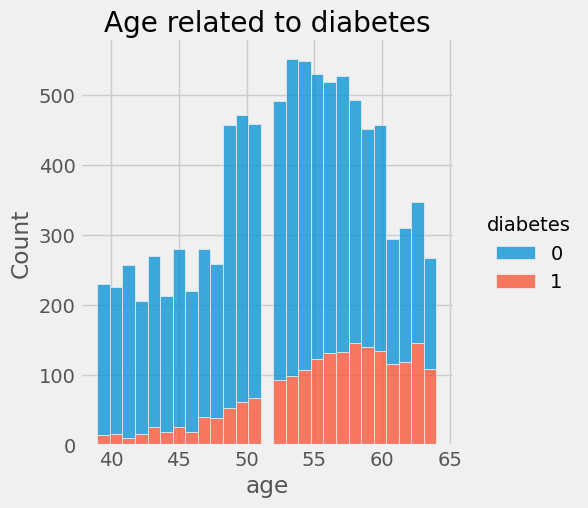

In [29]:
sns.displot(train_df,x="age", hue="diabetes", multiple='stack').set(title = 'Age related to diabetes')

Mostly diabetes is comes with age. graph shows that age increases chance of diabetes is more.

2.Weight

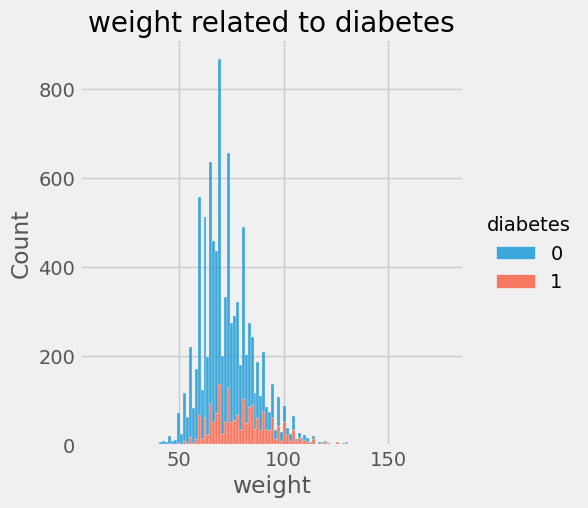

In [41]:
sns.displot(train_df,x="weight", hue="diabetes", multiple='stack').set(title = 'weight related to diabetes')

3.Height

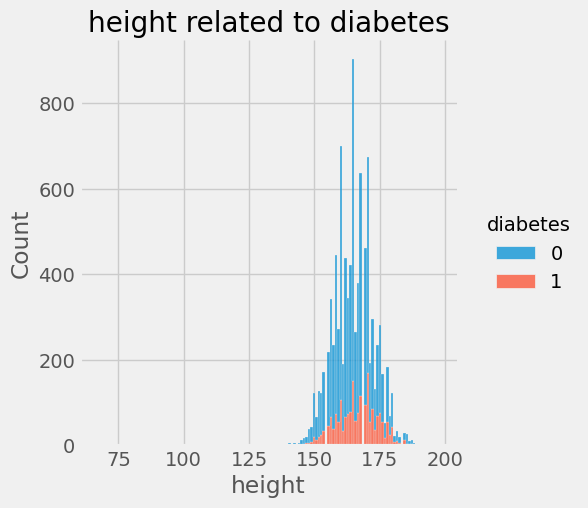

In [47]:
sns.displot(train_df,x="height", hue="diabetes", multiple='stack').set(title = 'height related to diabetes')

weight and height are not directly effect on target variable.

4.Glucose

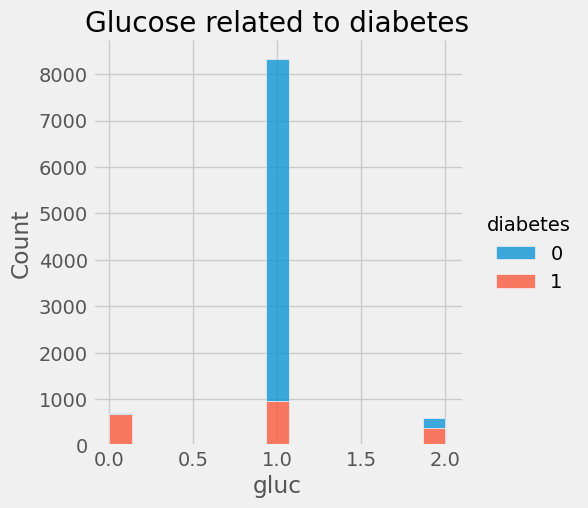

In [31]:
sns.displot(train_df,x="gluc", hue="diabetes", multiple='stack').set(title = 'Glucose related to diabetes')

Glucose increases diabetes increases at limited level.

5.Gender

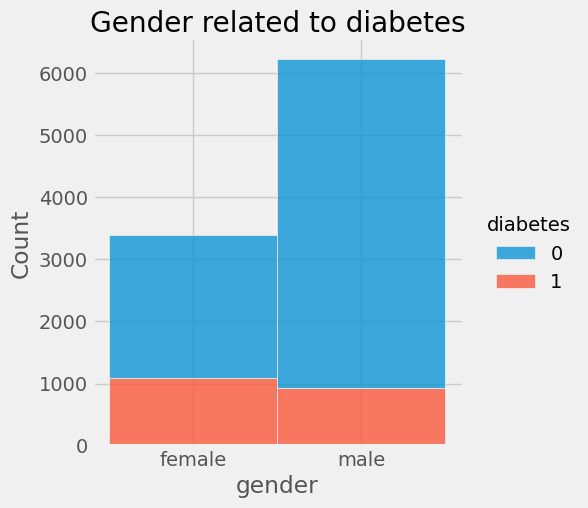

In [48]:
sns.displot(train_df,x="gender", hue="diabetes", multiple='stack').set(title = 'Gender related to diabetes')

According to graph chance of diabetes is little more in female than male.

6.cholesterol

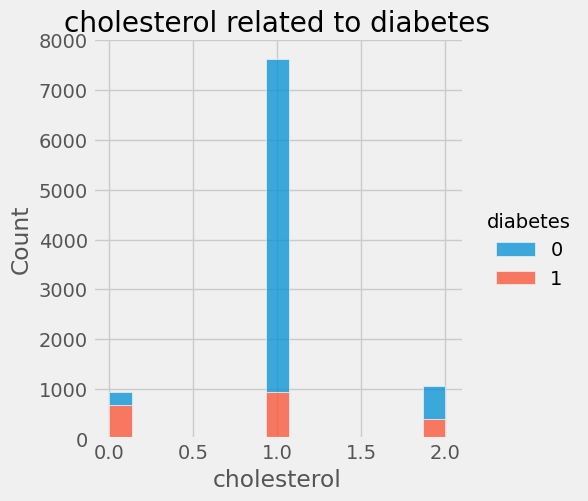

In [43]:
sns.displot(train_df,x="cholesterol", hue="diabetes", multiple='stack').set(title = 'cholesterol related to diabetes')

6.smoke

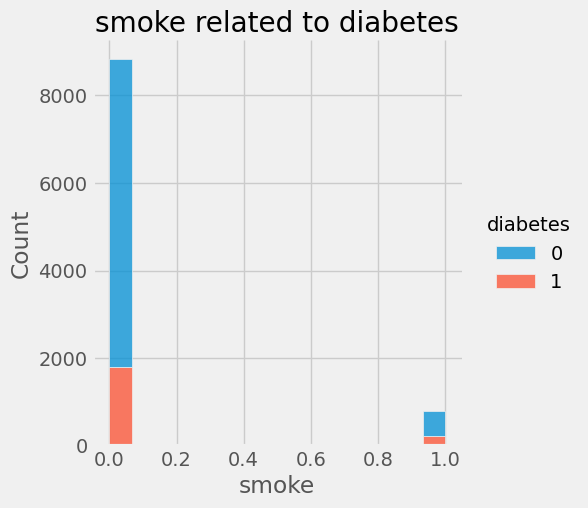

In [44]:
sns.displot(train_df,x="smoke", hue="diabetes", multiple='stack').set(title = 'smoke related to diabetes')

smoking is not affected chance of diabeates.

7.Low pressure

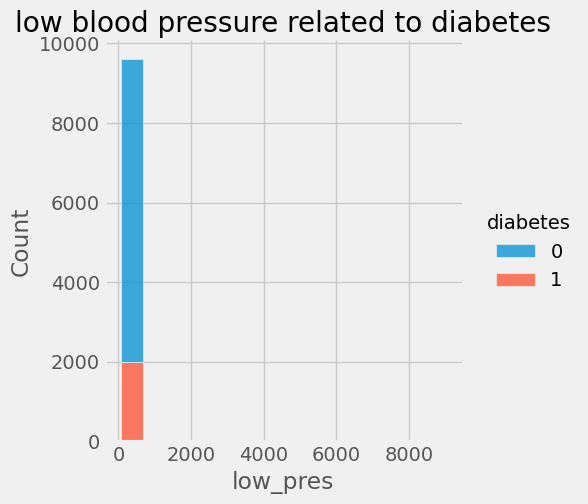

In [45]:
sns.displot(train_df,x="low_pres", hue="diabetes", multiple='stack').set(title = 'low blood pressure related to diabetes')

Low blood pressure is not affected chance of diabeates.

High blood pressure

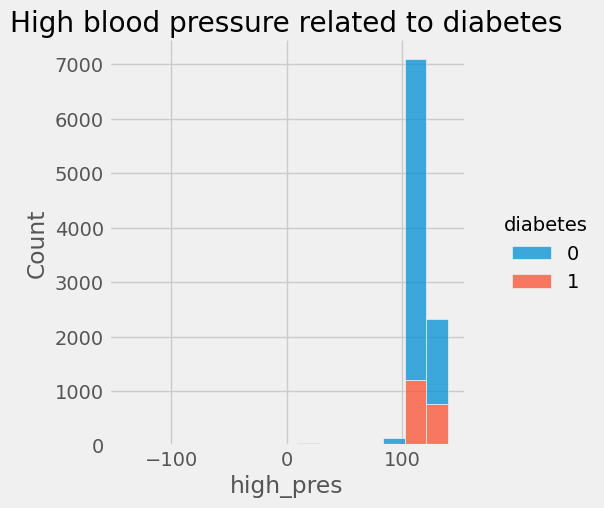

In [46]:
sns.displot(train_df,x="high_pres", hue="diabetes", multiple='stack').set(title = 'High blood pressure related to diabetes')

Mostly diabetic patients has 130 blood pressure

8.Active

In [ ]:
sns.displot(train_df,x="active", hue="diabetes", multiple='stack').set(title = 'Active related to diabetes')

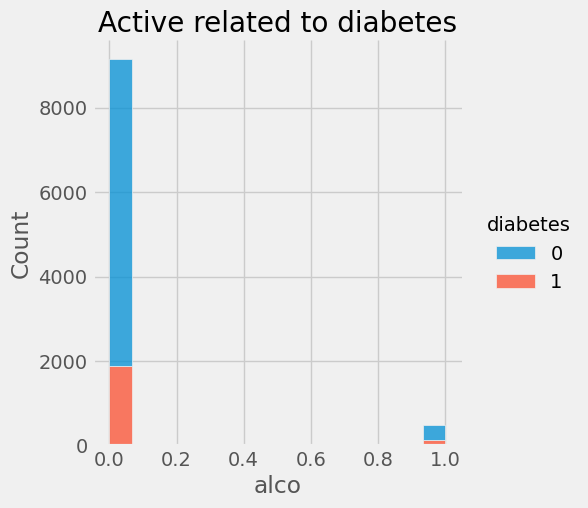

In [40]:
sns.displot(train_df,x="alco", hue="diabetes", multiple='stack').set(title = 'Active related to diabetes')

active is also not realated to diseases

**check ralationship between variable**

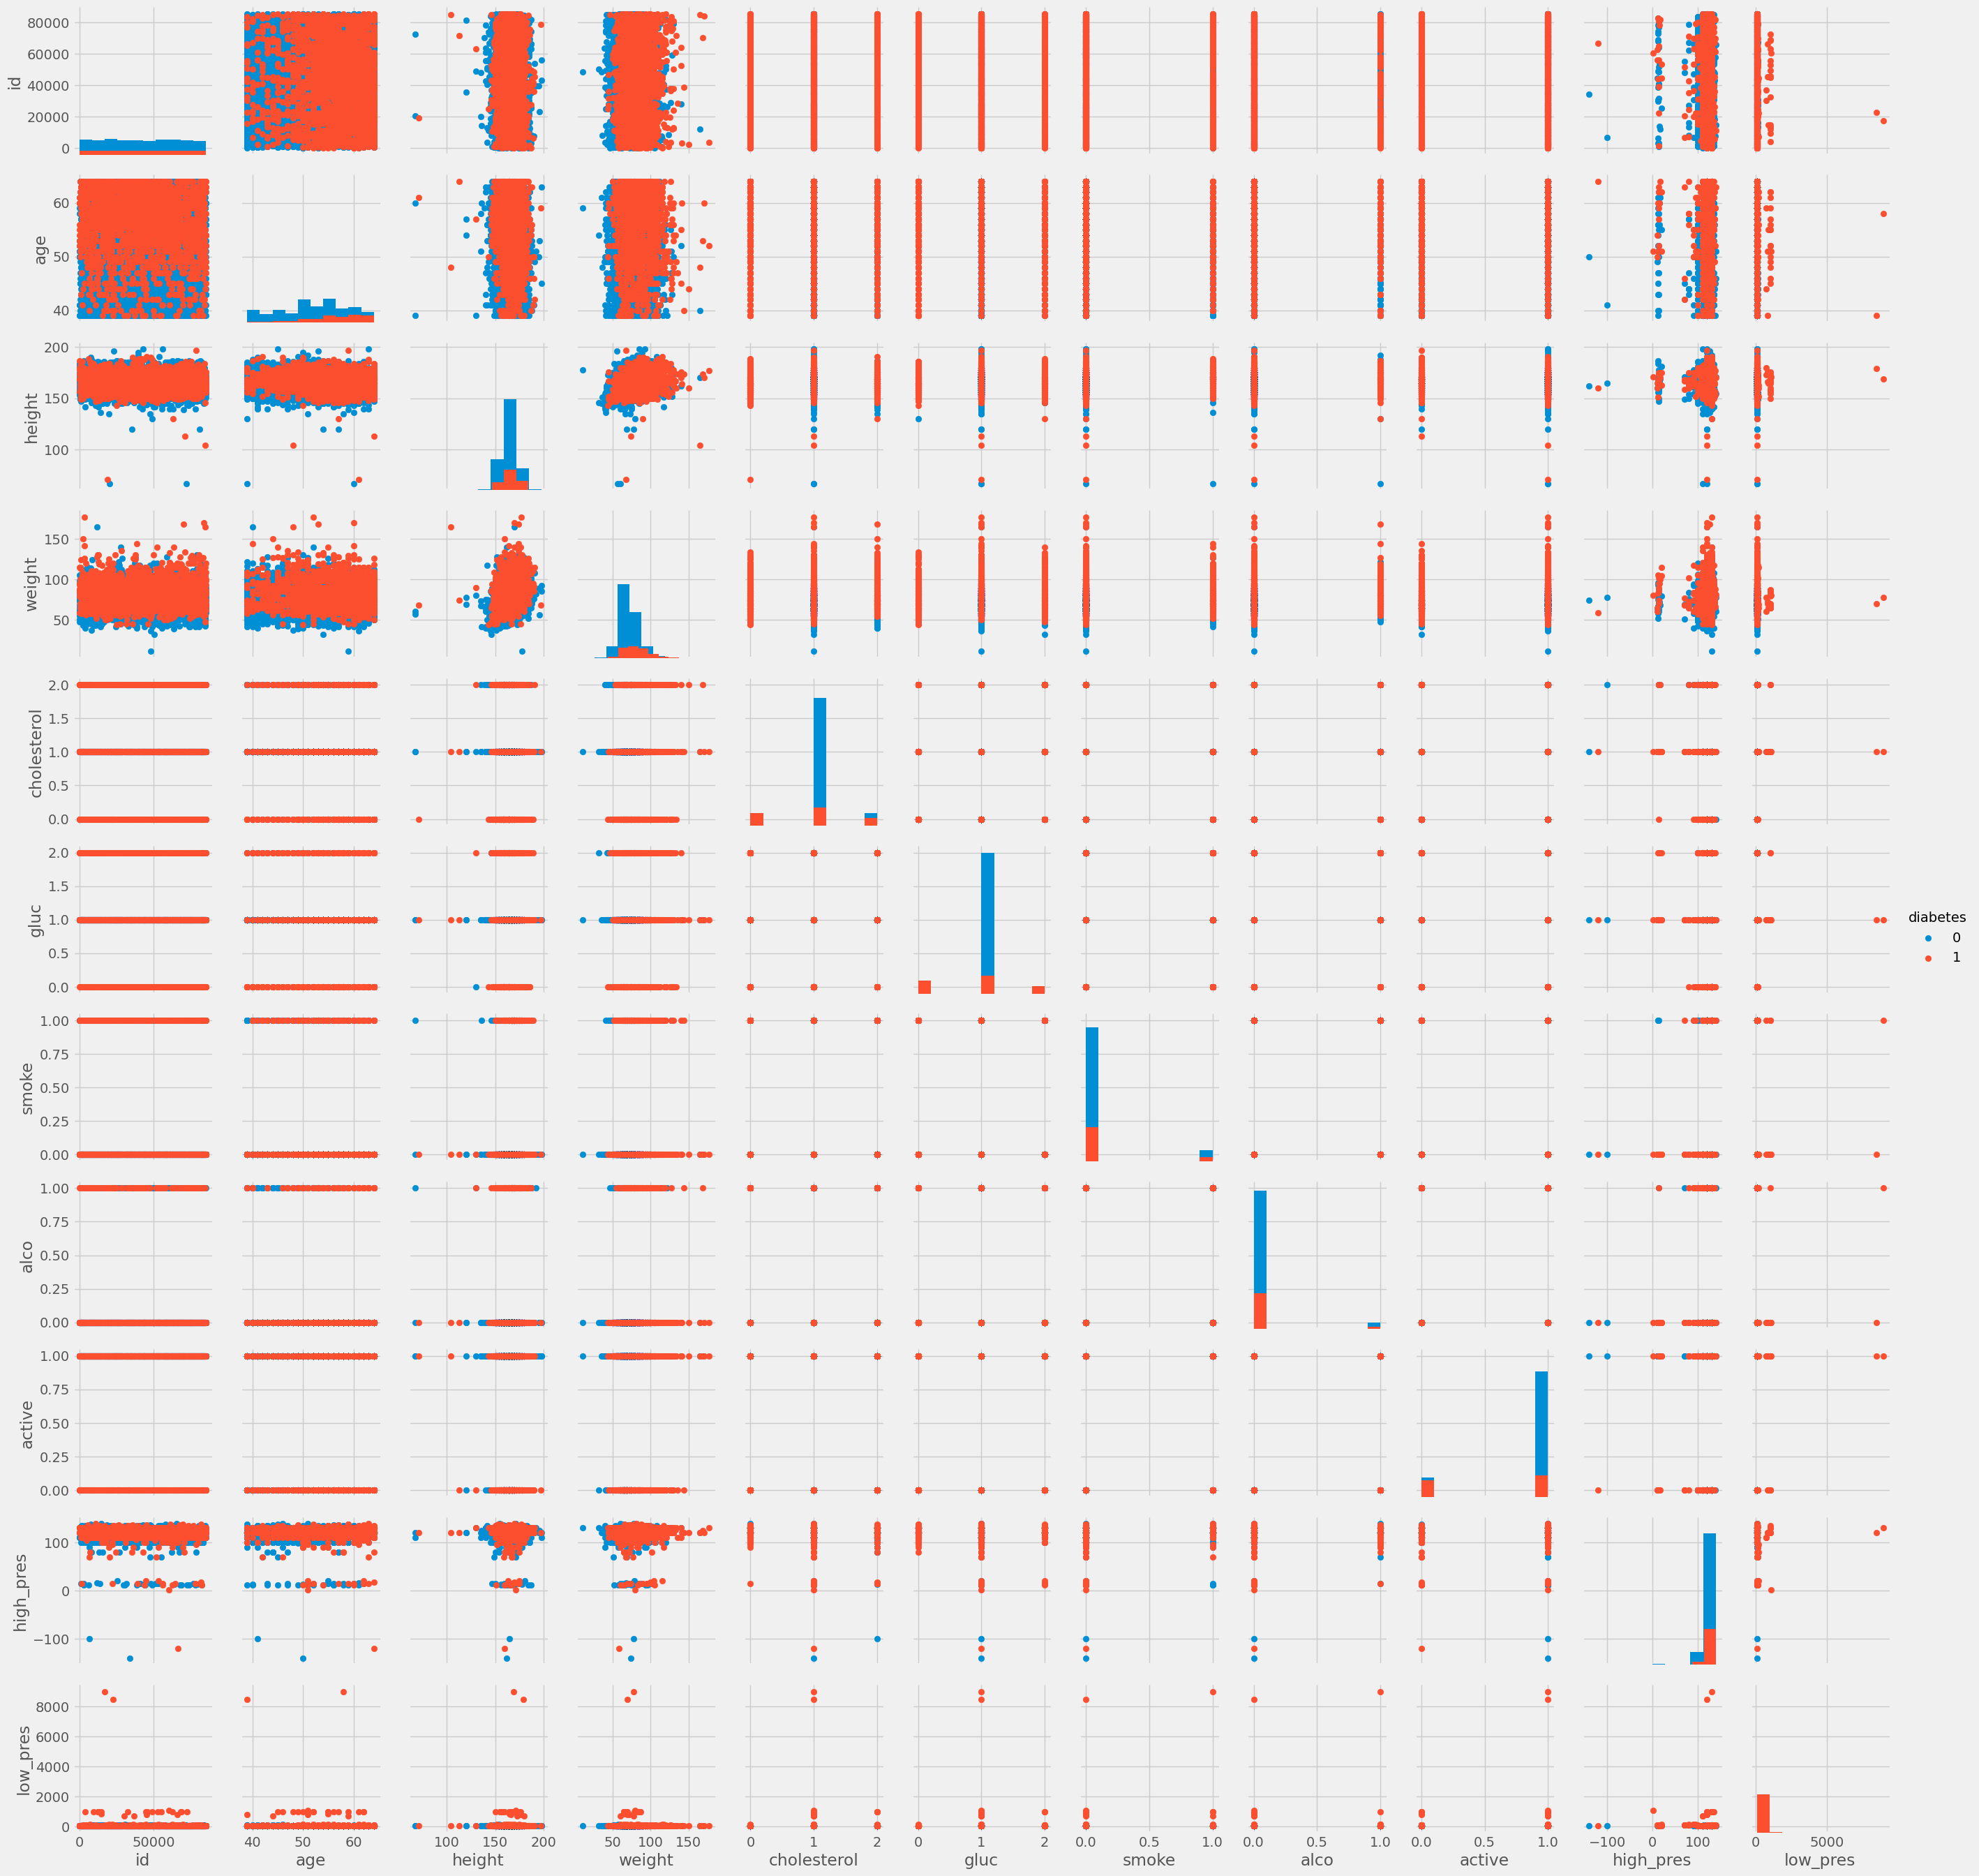

In [32]:
g = sns.PairGrid(train_df, hue="diabetes")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

High blood pressure related to weight and height directly.

Data Imbalance

When i was analysing the target variable.i found data is imbalanced .for balancing the dataset used smote oversampling.

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
target_count = train_df.diabetes.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

Class 0: 7605
Class 1: 2014
Proportion: 3.78 : 1


In [ ]:
X = train_df.drop(labels='diabetes',axis=1)
y = train_df['diabetes']

work on test data set

In [ ]:
test_analysis = pd.read_csv('/content/drive/MyDrive/Disease prediction /diabetes_v2/diabetes_test_analysis.csv')

In [ ]:
test_info = pd.read_csv('/content/drive/MyDrive/Disease prediction /diabetes_v2/diabetes_test_info.csv')

In [ ]:
test_df = pd.merge(test_info,test_analysis,how='inner')

In [ ]:
test_df.isnull().sum()

id               0
age              0
height           0
weight         320
gender           0
cholesterol      0
gluc             0
smoke            0
alco             0
active           0
pressure         0
diabetes         0
dtype: int64

In [ ]:
train_df['weight']= train_df['weight'].fillna(train_df['weight'].mean())
test_df['weight']= test_df['weight'].fillna(train_df['weight'].mean())

In [ ]:
le = LabelEncoder()
test_df['cholesterol'] = le.fit_transform(test_df['cholesterol'])
test_df['gluc'] = le.fit_transform(test_df['gluc'])

In [ ]:
test_df["gender"] = test_df["gender"].apply(lambda x:"male" if x=="m" else("female" if x == "f" else x))

In [ ]:
age_lower100 = 0
age_higher100 = 0
for i in test_df['age']:
  if i<=100:
    age_lower100 += 1
  else:
    age_higher100 += 1
print('age lower than 100',age_lower100)
test_df = test_df[test_df["age"]<=100].reset_index(drop=True)

age lower than 100 2959


In [ ]:
test_df['high_pres'] = [s.split('/')[0] if '/' in s else s.split('\\')[0] for s in test_df["pressure"]]
test_df['low_pres'] = [s.split('/')[1] if '/' in s else s.split('\\')[1] for s in test_df["pressure"]]

In [ ]:
test_df.drop(columns = 'pressure',inplace = True)

In [ ]:
test_df['high_pres'] = test_df['high_pres'].astype(int)
test_df['low_pres'] = test_df['low_pres'].astype(int)

In [ ]:
test_df = test_df[test_df["high_pres"]<140]
test_df = test_df[test_df["low_pres"]>70]

In [ ]:
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

In [ ]:
test_df.isnull().sum()

id               0
age              0
height           0
weight           0
cholesterol      0
gluc             0
smoke            0
alco             0
active           0
diabetes         0
high_pres        0
low_pres         0
gender_female    0
gender_male      0
dtype: int64

In [ ]:
train_df.head()

,id,age,height,weight,cholesterol,gluc,smoke,alco,active,diabetes,high_pres,low_pres,gender_female,gender_male
0,0,50,168,62.0,1,1,0,0,1,0,110,80,1,0
3,9,60,157,93.0,0,1,0,0,1,1,130,80,0,1
4,12,61,178,95.0,0,0,0,0,1,1,130,90,1,0
8,42,50,155,105.0,0,1,0,0,1,0,120,80,0,1
11,49,50,175,95.0,1,1,0,0,1,0,120,80,1,0


In [ ]:
test_df.head()

,id,age,height,weight,cholesterol,gluc,smoke,alco,active,diabetes,high_pres,low_pres,gender_female,gender_male
1,85670,53,166,65.0,1,1,0,0,0,0,110,80,0,1
2,85672,62,169,70.0,1,1,0,0,1,0,120,89,1,0
3,85673,40,168,60.0,1,1,0,0,0,0,130,80,1,0
4,85674,52,167,67.0,1,1,0,0,1,0,120,80,1,0
6,85685,55,161,80.0,2,1,0,0,1,1,130,90,1,0


id column is not needed ,so i deleted that column of both data set.

In [ ]:
train_df.drop(columns = "id",inplace = True)

In [ ]:
test_df.drop(columns = "id",inplace = True)

In [ ]:
X_train = train_df.drop(columns = "diabetes")
y_train = train_df["diabetes"]
X_test = test_df.drop(columns = "diabetes")
y_test = test_df["diabetes"]

Model implementation and accuracy value of that

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
scaler = StandardScaler()

# fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# make predictions on the testing data
y_pred = logreg.predict(X_test_scaled)

# compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.86
Precision: 0.62
Recall: 0.73
F1-score: 0.67


Finally i got 85 % accuracy of logistic regression. this accuracy also good for model.i can go with that.but if we want more better accuracy than this model,we can try some other calassification model like, knn,random forest classifier,xgboost classifier. but lack of time i cannot work on that.

**CONCLUSION**

1.Glucose, Age, gender and high blood pressure a are the most important factors in identifying persons who are at risk of diabetes. Other variables' importance is not significant

2.Identifying the risk of diabetes at early stages, especially among woman, can help to control the disease and prevent the second health problems.

3 Due to less data set variable are giving proper result. on Eda , show that active ,alco,cholesterol not impacted on target variable. 
i am not sataisfiy with this result .so training dataset ia less need some more information for better accuracy.finally
 Glucose ,Age should be given  importance in identifying high risk patients.